In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing

### Importing data

In [ ]:
URL = 'https://raw.githubusercontent.com/Andrewkimmm/Parkinson/main/parkinsons_updrs%20(1).data'
data = pd.read_csv(URL)
data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


### Dropping Unnecessary Columns

In [ ]:
df_feature = data.drop(['subject#', 'motor_UPDRS', 'total_UPDRS'], axis = 1)
df_label = data[['motor_UPDRS', 'total_UPDRS']]

# to numpy
feature = df_feature.to_numpy()
label = df_label.to_numpy()

print (f"features: {feature.shape}")
print (f"labels: {label.shape}")

features: (5875, 19)
labels: (5875, 2)


### Missing data

In [ ]:
print(df_feature.isnull().any())

age              False
sex              False
test_time        False
Jitter(%)        False
Jitter(Abs)      False
Jitter:RAP       False
Jitter:PPQ5      False
Jitter:DDP       False
Shimmer          False
Shimmer(dB)      False
Shimmer:APQ3     False
Shimmer:APQ5     False
Shimmer:APQ11    False
Shimmer:DDA      False
NHR              False
HNR              False
RPDE             False
DFA              False
PPE              False
dtype: bool


**No missing values**

### Outlier detection

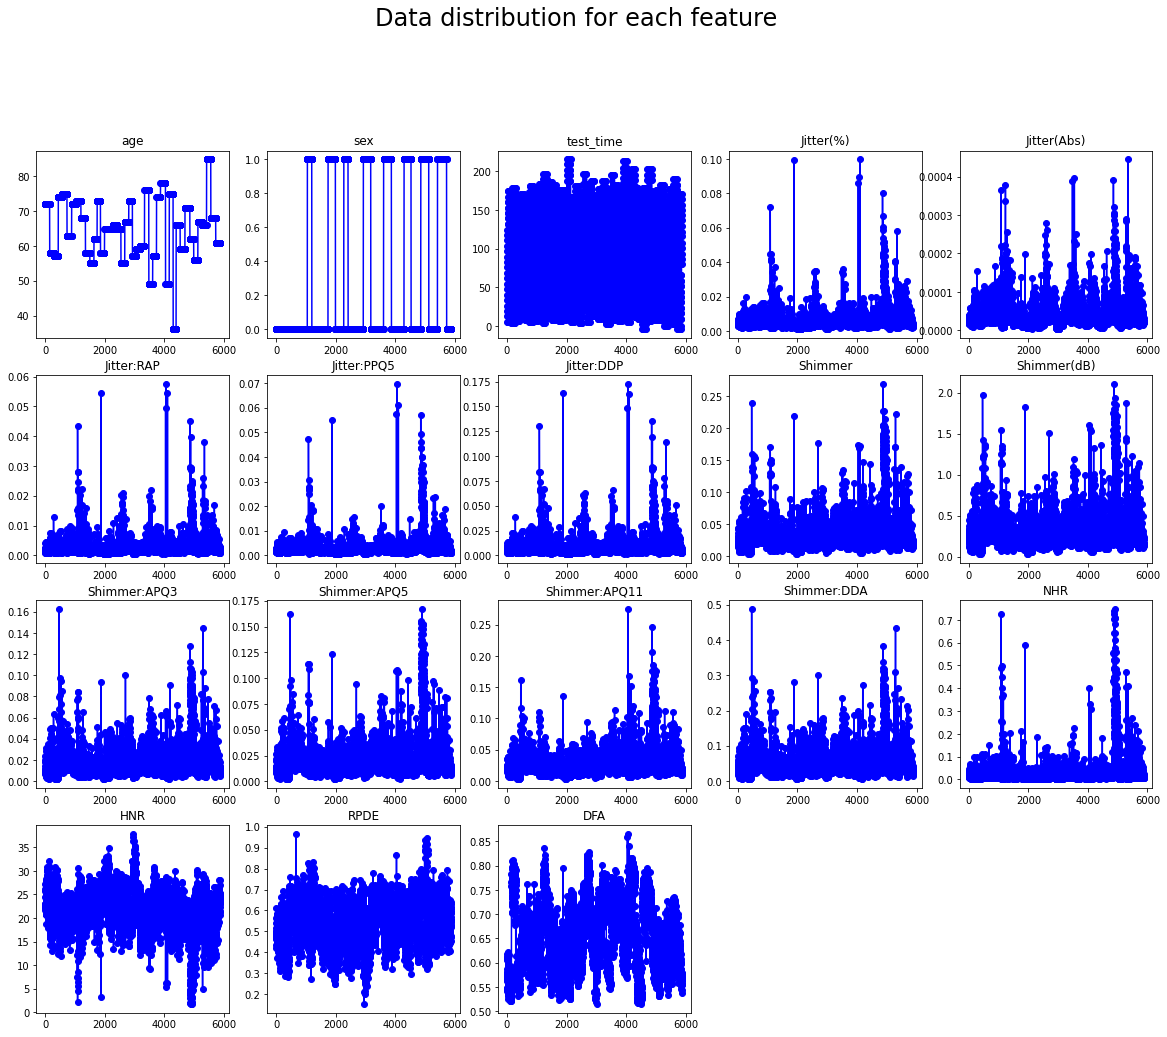

In [ ]:
plt.figure(figsize = (20,20))

for i in range(1, 19):
    plt.subplot(5,5,i)
    plt.plot(feature[:,i-1], 'bo-')
    plt.title(f'{df_feature.columns[i-1]}')
  
plt.suptitle ("Data distribution for each feature", fontsize=24)
plt.show ()

**Looks like there are some Outliers, from Google, optimal Outlier removal is 0.3% in this case, 5875 * 0.003 = 17.7**

minimum outliers: 146, n_neighbors: 9


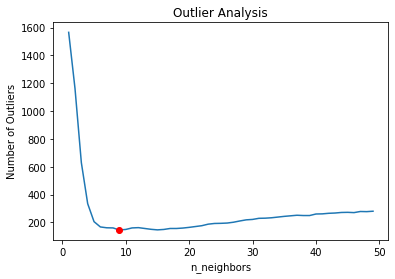

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
outlier_number = []
min_num_outlier = 2000 # placeholder

for i in range(1,50):
    lof = LocalOutlierFactor(n_neighbors = i)
    outlier = lof.fit_predict(feature)

    num_outlier = len(outlier[outlier == -1])

    # n_neighbor that minimizes num_outlier
    if num_outlier < min_num_outlier:
      min_num_outlier = num_outlier
      n_neigh = int(i)
    
    outlier_number += [num_outlier]
    
    
print (f"minimum outliers: {min_num_outlier}, n_neighbors: {n_neigh}")

plt.plot(range(1,50), outlier_number)
plt.plot(n_neigh, min_num_outlier, "ro")
plt.xlabel ("n_neighbors")
plt.ylabel ("Number of Outliers")
plt.title ("Outlier Analysis")
plt.show ()

we'll take 9 as n_neighbors

In [ ]:
lof = LocalOutlierFactor(n_neighbors = n_neigh)
outlier = lof.fit_predict(feature)
num_outlier = len(outlier[outlier == -1])

print(f"Using n_neighbors: {n_neigh}")
print(f"Minimum num_outlier: {num_outlier}")

data_r = feature[outlier == 1] # data + removed
label_r = label[outlier==1]
print(f'Feature with dropped outliers: {data_r.shape}')
print(f'Label with dropped outliers: {label_r.shape}')

Using n_neighbors: 9
Minimum num_outlier: 146
Feature with dropped outliers: (5729, 19)
Label with dropped outliers: (5729, 2)


Two times than what we intended but since we have enough data, we think it's no big deal

In [ ]:
#data_r_df = pd.DataFrame(data_r)

#df_x_data = pd.DataFrame (data_r, columns=df_feature.columns)
#df_y_data = pd.DataFrame (label_r, columns=df_label.columns)

#X_updrs = data_r_df.drop (['subject#','motor_UPDRS', 'total_UPDRS'], axis=1)
#y_updrs = data_r_df[['motor_UPDRS', 'total_UPDRS']]

X_updrs = data_r
y_updrs = label_r

print(X_updrs.shape, y_updrs.shape)

(5729, 19) (5729, 2)


## Scaling - Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_updrs_s = scaler.fit_transform (X_updrs)

X_updrs_s

array([[ 0.82077574, -0.68014625, -1.63025408, ..., -1.22292207,
        -1.48687479, -0.66570913],
       [ 0.82077574, -0.68014625, -1.49903242, ..., -1.06221879,
        -1.25616572, -1.24925255],
       [ 0.82077574, -0.68014625, -1.36795837, ..., -0.78897313,
        -1.54853831, -0.10327928],
       ...,
       [-0.43907584, -0.68014625,  1.19445997, ..., -0.63177428,
        -1.0570645 , -0.87336344],
       [-0.43907584, -0.68014625,  1.32357212, ...,  0.2766749 ,
        -1.27733169, -0.86808504],
       [-0.43907584, -0.68014625,  1.4543659 , ...,  0.45119567,
        -1.17150184, -0.74095433]])

In [ ]:
y_updrs_s = scaler.fit_transform(y_updrs)

y_updrs_s

array([[ 0.84877931,  0.50231816],
       [ 0.87921676,  0.54855782],
       [ 0.90965421,  0.59470425],
       ...,
       [ 0.02598639,  0.32491077],
       [-0.03390665,  0.27941691],
       [-0.09453609,  0.2333637 ]])

## PCA(to reduce noises)

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components = 19)
X_data_pca = pca.fit_transform(X_updrs_s)
pca.explained_variance_ratio_

array([5.87075294e-01, 9.41887463e-02, 7.74358976e-02, 5.37748627e-02,
       5.21307190e-02, 4.21256037e-02, 3.83647575e-02, 1.57548260e-02,
       1.14888416e-02, 9.21920798e-03, 8.24143766e-03, 5.33097042e-03,
       2.29675512e-03, 1.09532292e-03, 7.06508691e-04, 5.24278357e-04,
       2.45946042e-04, 2.36527278e-08, 1.18961814e-09])

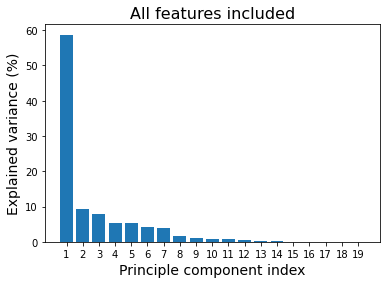

In [ ]:
plt.bar (range(1,20), pca.explained_variance_ratio_*100)
plt.title ("All features included", fontsize=16)
plt.xlabel ("Principle component index", fontsize=14)
plt.ylabel ("Explained variance (%)", fontsize=14)
plt.xticks (np.arange (1,20))
plt.show ()

In [ ]:
print(f'{np.sum(pca.explained_variance_ratio_[0:8])*100:1.2f}% is explained using\
 {len(pca.explained_variance_ratio_[0:8])} features')

96.09% is explained using 8 features


In [ ]:
pca = PCA (n_components = 8)
X_reduced = pca.fit_transform (X_updrs_s)


print (X_reduced.shape)

(5729, 8)


### train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_updrs_s, test_size = 0.3, random_state = 924)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4010, 8) (1719, 8) (4010, 2) (1719, 2)



# Different model tryouts

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
names = ["Linear", "Ridge", "Lasso", "ElasticNet", "KernelRidge", "SVR",\
         "Nearest_Neighbors", "Decision_Tree", "Random_Forest", " Extra_Trees", \
         "Gradient_Boosting", "Ada_Boost", "MLP"]


regressors = [
    LinearRegression(),
    Ridge(alpha = 1, max_iter = 1000),
    Lasso(alpha = 1, max_iter = 1000),
    ElasticNet(alpha = 1, l1_ratio = 0.5, max_iter = 1000),
    KernelRidge(alpha = 1, degree = 3),
    SVR(kernel = 'rbf', C = 1, epsilon = 0.1, max_iter = 1000),
    KNeighborsRegressor(n_neighbors = 5),
    DecisionTreeRegressor(max_depth = 10),
    RandomForestRegressor(n_estimators = 100, max_depth = 10),
    ExtraTreesRegressor(n_estimators = 100),
    GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100, alpha = 0.9),
    AdaBoostRegressor(n_estimators = 100, learning_rate = 0.1),
    MLPRegressor(hidden_layer_sizes = 100, solver = 'adam', alpha = 0.0001, learning_rate_init = 0.001, max_iter = 1000, epsilon = 1e-8)]

### motor_updrs(cross validation)

In [ ]:
# rearranging index
X_train_cols = ["PCA "+str(i+1) for i in range (X_train.shape[1])]
X_train = pd.DataFrame(X_train, columns=X_train_cols)
X_train

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8
0,-0.316568,-1.857298,-1.456886,-0.140247,0.655788,0.160773,-1.715827,0.195994
1,-2.298542,-0.648520,-0.585914,0.656852,-0.740410,-0.208677,0.594399,0.517022
2,-0.106234,1.563202,-0.696856,-0.823608,0.902864,0.844192,0.038523,0.128284
3,-2.434051,0.880717,0.922743,-0.241464,-0.366600,-1.551227,0.729752,0.273019
4,-0.245497,0.951216,0.757374,0.445910,-1.151862,-0.869954,-1.016301,-0.821435
...,...,...,...,...,...,...,...,...
4005,2.496667,-1.952514,-0.530826,-0.038067,1.195666,0.617272,-0.569249,-0.089884
4006,-2.282838,-0.554629,-0.268736,-0.381928,0.283079,0.739362,-0.357208,-0.327823
4007,-2.249202,-1.721234,-0.840904,0.880592,1.216050,0.670403,-1.470214,1.153530
4008,0.802105,0.057637,-1.014667,2.159660,0.695838,0.474824,-0.477292,0.429899


In [ ]:
y_train = pd.DataFrame(y_train)
y_train

,0,1
0,0.390990,0.361828
1,-1.202680,-1.074491
2,-0.209413,-0.199947
3,-0.307475,-0.394507
4,0.340425,-0.064118
...,...,...
4005,-0.402961,-0.245627
4006,-0.771156,-0.663462
4007,0.125767,0.351480
4008,0.600616,0.366676


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)

j = 0
df = pd.DataFrame()

for train_idx, val_idx in kf.split(X_train, y_train[0]):

  X_tr = X_train.loc[train_idx]
  y_tr = y_train[0].loc[train_idx]
  X_val = X_train.loc[val_idx]
  y_val = y_train[0].loc[val_idx]

  scores = []
  for name, clf in zip(names, regressors):
      clf.fit(X_tr, y_tr);
      score = clf.score(X_val, y_val);
      scores.append(score);
  
  df[j] = scores
  j += 1

df_avg = pd.DataFrame()
df_avg['name'] = names
df_avg['score'] = df.mean(axis =1)
df_sorted = df_avg.sort_values('score', ascending=False)

df_sorted

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-

,name,score
12,MLP,0.634091
9,Extra_Trees,0.623776
6,Nearest_Neighbors,0.576883
8,Random_Forest,0.536499
5,SVR,0.418352
10,Gradient_Boosting,0.358075
7,Decision_Tree,0.240536
11,Ada_Boost,0.188352
4,KernelRidge,0.110662
1,Ridge,0.109574


### total_updrs(cross validation)

In [ ]:
j = 0
df = pd.DataFrame()

for train_idx, val_idx in kf.split(X_train, y_train[1]):

  X_tr = X_train.loc[train_idx]
  y_tr = y_train[1].loc[train_idx]
  X_val = X_train.loc[val_idx]
  y_val = y_train[1].loc[val_idx]

  scores = []
  for name, clf in zip(names, regressors):
      clf.fit(X_tr, y_tr);
      score = clf.score(X_val, y_val);
      scores.append(score);
  
  df[j] = scores
  j += 1

df_avg = pd.DataFrame()
df_avg['name'] = names
df_avg['score'] = df.mean(axis =1)
df_sorted = df_avg.sort_values('score', ascending=False)
df_sorted

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-

,name,score
12,MLP,0.602956
9,Extra_Trees,0.592727
6,Nearest_Neighbors,0.547883
8,Random_Forest,0.502679
5,SVR,0.348489
10,Gradient_Boosting,0.339793
11,Ada_Boost,0.208042
4,KernelRidge,0.137163
1,Ridge,0.136552
0,Linear,0.136549


상위 5개
MLP, Extra_trees, Nearest_Neighbors, Random_Forest, SVR 

# Grid Search CV

In [ ]:
X_test = pd.DataFrame(X_test, columns=X_train_cols)
y_test = pd.DataFrame(y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

### SVR_m

In [ ]:
# before
svr_m = SVR(kernel = 'rbf', C = 1, epsilon = 0.1, max_iter = 10000)
svr_m.fit(X_train, y_train[0])

print(f' Before tuning = {svr_m.score(X_test, y_test[0])}')

# go through kernel, C, epsilon

search_space = {"kernel" : ['poly', 'rbf', 'sigmoid'], 
                "C" : [0.1, 1, 10, 100],
                "epsilon" : [0.01, 0.1, 1, 10]}

GS = GridSearchCV(estimator = svr_m,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  n_jobs = 2,
                  verbose = 4)

GS.fit(X_train, y_train[0])

print(GS.best_estimator_)
print(GS.best_params_)
print(GS.best_score_)

 Before tuning = 0.5034288579583335
Fitting 5 folds for each of 48 candidates, totalling 240 fits
SVR(C=10, max_iter=10000)
{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
0.5316294163455025


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
svr_m = SVR(kernel = 'rbf', C = 10, epsilon = 0.1, max_iter = 10000)
svr_m.fit(X_train, y_train[0])
print(f' After tuning : {svr_m.score(X_test, y_test[0])}')

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 After tuning : 0.5723674636724576


### SVR_t

In [ ]:
#before
svr_t = SVR(kernel = 'rbf', C = 1, epsilon = 0.1, max_iter = 10000)
svr_t.fit(X_train, y_train[0])

print (svr_t.score(X_test, y_test[1]))

# go through kernel, C, epsilon

search_space = {"kernel" : ['poly', 'rbf', 'sigmoid'], 
                "C" : [0.01, 0.1, 1, 10],
                "epsilon" : [0.01, 0.1, 1, 10]}

GS1 = GridSearchCV(estimator = svr_t,
                  param_grid = search_space,
                  scoring = ["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  n_jobs = 4,
                  verbose = 4)

GS1.fit(X_train, y_train[1])

print(GS1.best_estimator_)
print(GS1.best_params_)
print(f' After tuning = {GS1.best_score_}')

0.425024982385347
Fitting 5 folds for each of 48 candidates, totalling 240 fits
SVR(C=10, max_iter=10000)
{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
 After tuning = 0.49087185449131976


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
svr_t = SVR(kernel = 'rbf', C = 10, epsilon = 0.1, max_iter = 10000)
svr_t.fit(X_train, y_train[1])
print(f' After tuning : {svr_t.score(X_test, y_test[1])}')

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 After tuning : 0.5370967812975818


### Random Forest_m

In [ ]:
#before

rf_m = RandomForestRegressor(n_estimators = 100, max_depth = 10)
rf_m.fit(X_train, y_train[0])

print (rf_m.score(X_test, y_test[0]))

# go through kernel, C, epsilon
#"criterion" : ["squared_error", "absolute_error"],
search_space = {"n_estimators" : [100, 150, 200],
                "max_depth" : [25 ,30, 35],
                }

GS2 = GridSearchCV(estimator = rf_m,
                  param_grid = search_space,
                  scoring = ["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  n_jobs = 2,
                  verbose = 4)

GS2.fit(X_train, y_train[0])

print(GS2.best_estimator_)
print(GS2.best_params_)
print(GS2.best_score_)


0.584184202316099
Fitting 5 folds for each of 9 candidates, totalling 45 fits
RandomForestRegressor(max_depth=25, n_estimators=200)
{'max_depth': 25, 'n_estimators': 200}
0.5827726296194042


In [ ]:
rf_m = RandomForestRegressor(n_estimators = 150, max_depth = 25)
rf_m.fit(X_train, y_train[0])

print (f'After tuning : {rf_m.score(X_test, y_test[0])}')

After tuning : 0.6363700458130703


### Random Forest_t

In [ ]:
#before

rf_t = RandomForestRegressor(n_estimators = 100, max_depth = 10)
rf_t.fit(X_train, y_train[1])

print (rf_t.score(X_test, y_test[1]))

# go through kernel, C, epsilon

search_space = {"n_estimators" : [150,175, 200],
                "max_depth" : [15,20,25],
                }

GS3 = GridSearchCV(estimator = rf_t,
                  param_grid = search_space,
                  scoring = ["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  n_jobs = 4,
                  verbose = 4)

GS3.fit(X_train, y_train[1])

print(GS3.best_estimator_)
print(GS3.best_params_)
print(GS3.best_score_)

0.568859890075418
Fitting 5 folds for each of 9 candidates, totalling 45 fits
RandomForestRegressor(max_depth=20, n_estimators=175)
{'max_depth': 20, 'n_estimators': 175}
0.5431904826173969


In [ ]:
rf_t = RandomForestRegressor(n_estimators = 175, max_depth = 20)
rf_t.fit(X_train, y_train[1])

print (f'After tuning : {rf_t.score(X_test, y_test[1])}')

After tuning : 0.6081014287647282


### Nearest Neighbor_m

In [ ]:
#before

knn_m = KNeighborsRegressor(n_neighbors = 5)
knn_m.fit(X_train, y_train[0])

print (knn_m.score(X_test, y_test[0]))

# go through kernel, C, epsilon

search_space = {"n_neighbors" : [6, 7, 8, 9],
                "weights" : ['uniform', 'distance'],
                "leaf_size" : [1,2,3,4,5,6],
                "p" : [1,2]
                }

GS4 = GridSearchCV(estimator = knn_m,
                  param_grid = search_space,
                  scoring = ["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  n_jobs = 4,
                  verbose = 4)

GS4.fit(X_train, y_train[0])

print(GS4.best_estimator_)
print(GS4.best_params_)
print(GS4.best_score_)

0.6301911473796052
Fitting 5 folds for each of 96 candidates, totalling 480 fits
KNeighborsRegressor(leaf_size=1, n_neighbors=7, p=1, weights='distance')
{'leaf_size': 1, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.6005454694501535


In [ ]:
knn_m = KNeighborsRegressor(n_neighbors = 7, weights = 'distance', leaf_size = 1, p = 1)
knn_m.fit(X_train, y_train[0])

print(f' After Tuning: {knn_m.score(X_test, y_test[0])}')

 After Tuning: 0.6477939386103395


### Nearest_Neighbor_t

In [ ]:
#before

knn_t = KNeighborsRegressor(n_neighbors = 5)
knn_t.fit(X_train, y_train[1])

print (knn_t.score(X_test, y_test[1]))

# go through kernel, C, epsilon

search_space = {"n_neighbors" : [3,4,5, 6, 7],
                "weights" : ['uniform', 'distance'],
                "leaf_size" : [1,5,10,20,30,40],
                "p" : [1,2]
                }

GS5 = GridSearchCV(estimator = knn_m,
                  param_grid = search_space,
                  scoring = ["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  n_jobs = 4,
                  verbose = 4)

GS5.fit(X_train, y_train[1])

print(GS5.best_estimator_)
print(GS5.best_params_)
print(GS5.best_score_)

0.6030166377580903
Fitting 5 folds for each of 120 candidates, totalling 600 fits
KNeighborsRegressor(leaf_size=1, n_neighbors=6, p=1, weights='distance')
{'leaf_size': 1, 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
0.5734624753193314


In [ ]:
knn_t = KNeighborsRegressor(n_neighbors = 6, weights = 'distance', leaf_size = 1, p = 1)

knn_t.fit(X_train, y_train[1])

print(f' After Tuning: {knn_t.score(X_test, y_test[1])}')

 After Tuning: 0.6176522212991988


### Extra Trees_m

In [ ]:
#before

ext_m = ExtraTreesRegressor(n_estimators = 100)
ext_m.fit(X_train, y_train[0])

print (ext_m.score(X_test, y_test[0]))

# go through kernel, C, epsilon

#"n_estimators" : [50, 100, 150],
#                "criterion" : ['squared_error', 'absolute_error'],
#                "max_depth" : [10,20,30,40],
search_space = {"n_estimators" : [50,100,200,400,500],
                "max_depth" : [10,20,40,80,160],
                "warm_start" : [True]
                }

GS6 = GridSearchCV(estimator = ext_m,
                  param_grid = search_space,
                  scoring = ["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  n_jobs = 4,
                  verbose = 4)

GS6.fit(X_train, y_train[0])

print(GS6.best_estimator_)
print(GS6.best_params_)
print(GS6.best_score_)

0.6752121036940226
Fitting 5 folds for each of 25 candidates, totalling 125 fits
ExtraTreesRegressor(max_depth=80, n_estimators=500, warm_start=True)
{'max_depth': 80, 'n_estimators': 500, 'warm_start': True}
0.6276091441109071


In [ ]:
ext_m = ExtraTreesRegressor(n_estimators = 500, max_depth = 40, warm_start = True)
ext_m.fit(X_train, y_train[0])

print (f' After tuning : {ext_m.score(X_test, y_test[0])}')

 After tuning : 0.6781793695936811


### Extra_Trees_t

In [ ]:
#before

ext_t = ExtraTreesRegressor(n_estimators = 100)
ext_t.fit(X_train, y_train[1])

print (ext_m.score(X_test, y_test[1]))

# search space

search_space = {"n_estimators" : [50,100,200,400,500],
                "max_depth" : [10,20,40,80,160],
                "warm_start" : [True]
                }

GS7 = GridSearchCV(estimator = ext_t,
                  param_grid = search_space,
                  scoring = ["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  n_jobs = 4,
                  verbose = 4)

GS7.fit(X_train, y_train[1])

print(GS7.best_estimator_)
print(GS7.best_params_)
print(GS7.best_score_)

0.586552107694424
Fitting 5 folds for each of 25 candidates, totalling 125 fits
ExtraTreesRegressor(max_depth=80, n_estimators=500, warm_start=True)
{'max_depth': 80, 'n_estimators': 500, 'warm_start': True}
0.5980956325140558


In [ ]:
ext_t = ExtraTreesRegressor(n_estimators = 400, max_depth = 80, warm_start = True)
ext_t.fit(X_train, y_train[1])

print (f' After tuning : {ext_t.score(X_test, y_test[1])}')

 After tuning : 0.6528400290155262


### MLP Regressor_m


In [ ]:
#before

mlp_m = MLPRegressor(hidden_layer_sizes = 100, solver = 'adam', alpha = 0.0001, learning_rate_init = 0.001, max_iter = 1000, epsilon = 1e-8)
mlp_m.fit(X_train, y_train[0])

print (mlp_m.score(X_test, y_test[0]))

# search space
#'hidden_layer_sizes' : [100,200,300],
#                'activation' : ['logistic', 'tanh', 'relu'],
#               'alpha' : [0.00001, 0.0001, 0.001, 0.01],
#                'batch_size' : [50,100,150,200],
#                'learning_rate_init' : [0.0001, 0.001, 0.01, 0.1],
#                'max_iter' : [1000, 2000, 4000],
#                'shuffle' : [True, False],
#                'warm_start' : [True, False],
search_space = {'hidden_layer_sizes' : [100,200,300],
                'activation' : ['logistic', 'tanh', 'relu'],
                'alpha' : [0.001],
                'batch_size' : [100, 150],
                'learning_rate_init' : [0.001],
                'max_iter' : [4000],
                'shuffle' : [False],
                'warm_start' : [True],
                'beta_1' : [0.999],
                'beta_2' : [0.999],
                'epsilon' : [1e-7],
                }



GS8 = GridSearchCV(estimator = mlp_m,
                  param_grid = search_space,
                  scoring = ["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  n_jobs = 4,
                  verbose = 4)

GS8.fit(X_train, y_train[0])

print(GS8.best_estimator_)
print(GS8.best_params_)
print(GS8.best_score_)

0.681615767901717
Fitting 5 folds for each of 18 candidates, totalling 90 fits
MLPRegressor(activation='tanh', alpha=0.001, batch_size=100, beta_1=0.999,
             epsilon=1e-07, hidden_layer_sizes=300, max_iter=4000,
             shuffle=False, warm_start=True)
{'activation': 'tanh', 'alpha': 0.001, 'batch_size': 100, 'beta_1': 0.999, 'beta_2': 0.999, 'epsilon': 1e-07, 'hidden_layer_sizes': 300, 'learning_rate_init': 0.001, 'max_iter': 4000, 'shuffle': False, 'warm_start': True}
0.6968216903783354


In [ ]:
mlp_m = MLPRegressor(activation='tanh', alpha=0.001, batch_size=100, beta_1=0.999,
             epsilon=1e-07, hidden_layer_sizes=300, max_iter=4000,
             shuffle=False, warm_start=True)
mlp_m.fit(X_train, y_train[0])

print (f'After tuning, {mlp_m.score(X_test, y_test[0])}')

After tuning, 0.7471573397935376


### MLP Regressor_t

In [ ]:
#before

mlp_t = MLPRegressor(hidden_layer_sizes = 100, solver = 'adam', alpha = 0.0001, learning_rate_init = 0.001, max_iter = 1000, epsilon = 1e-8)
mlp_t.fit(X_train, y_train[1])

print (mlp_t.score(X_test, y_test[1]))

# search space
#'hidden_layer_sizes' : [100,200,300],
#                'activation' : ['logistic', 'tanh', 'relu'],
#               'alpha' : [0.00001, 0.0001, 0.001, 0.01],
#                'batch_size' : [50,100,150,200],
#                'learning_rate_init' : [0.0001, 0.001, 0.01, 0.1],
#                'max_iter' : [1000, 2000, 4000],
#                'shuffle' : [True, False],
#                'warm_start' : [True, False],
search_space = {'hidden_layer_sizes' : [200,300],
                'activation' : ['relu'],
                'alpha' : [0.0001],
                'batch_size' : [150],
                'learning_rate_init' : [0.001],
                'max_iter' : [4000],
                'shuffle' : [False],
                'warm_start' : [True],
                'beta_1' : [0.999],
                'beta_2' : [0.999],
                'epsilon' : [1e-7],
                }



GS9 = GridSearchCV(estimator = mlp_t,
                  param_grid = search_space,
                  scoring = ["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  n_jobs = 4,
                  verbose = 4)

GS9.fit(X_train, y_train[1])

print(GS9.best_estimator_)
print(GS9.best_params_)
print(GS9.best_score_)

0.6634215519044631
Fitting 5 folds for each of 6 candidates, totalling 30 fits
MLPRegressor(batch_size=150, beta_1=0.999, epsilon=1e-07,
             hidden_layer_sizes=200, max_iter=4000, shuffle=False,
             warm_start=True)
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 150, 'beta_1': 0.999, 'beta_2': 0.999, 'epsilon': 1e-07, 'hidden_layer_sizes': 200, 'learning_rate_init': 0.001, 'max_iter': 4000, 'shuffle': False, 'warm_start': True}
0.6653376104779609


In [ ]:
mlp_t = MLPRegressor(batch_size=150, beta_1=0.999, epsilon=1e-07,
             hidden_layer_sizes=200, max_iter=4000, shuffle=False,
             warm_start=True)
mlp_t.fit(X_train, y_train[1])

print (f'After tuning, {mlp_t.score(X_test, y_test[1])}')

After tuning, 0.7270965401721919


### Tuned models iteration

In [ ]:
names1 = ["SVR", "Random Forest", "KNN", "Extra Trees", "MLP"]


regressors1 = [
    SVR(kernel = 'rbf', C = 10, epsilon = 0.1, max_iter = 10000),
    RandomForestRegressor(n_estimators = 150, max_depth = 25),
    KNeighborsRegressor(leaf_size=1, n_neighbors=7, p=1, weights='distance'),
    ExtraTreesRegressor(n_estimators = 500, max_depth = 40, warm_start = True),
    MLPRegressor(activation='tanh', alpha=0.001, batch_size=100, beta_1=0.999,
             epsilon=1e-07, hidden_layer_sizes=300, max_iter=4000,
             shuffle=False, warm_start=True)]

In [ ]:

df = pd.DataFrame()
for j in range(0,5):

  scores = []
  for name, clf in zip(names1, regressors1):
      clf.fit(X_train, y_train[0]);
      score = clf.score(X_test, y_test[0]);
      scores.append(score);
  df[j] = scores


df_avg = pd.DataFrame()
df_avg['name'] = names1
df_avg['score'] = df.mean(axis =1)
df_sorted = df_avg.sort_values('score', ascending=False)
df_sorted

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/p

,name,score
2,KNN,0.647794
1,Random Forest,0.637114
4,MLP,0.630447
3,Extra Trees,0.592256
0,SVR,0.572367
